In [100]:
import numpy as np

import matplotlib.pyplot as plt

In [101]:
N, Nt = 100, 200
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_symmetric(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i+1] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

In [102]:
N, Nt = 100, 2000
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_symmetric(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt-1):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i+1] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

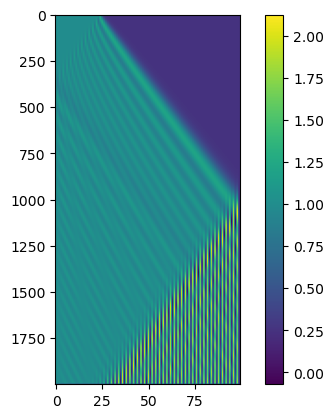

In [103]:
rho_mat = advect_symmetric(t, x, u, rho)
plt.imshow(rho_mat, aspect = 0.1)
plt.colorbar()

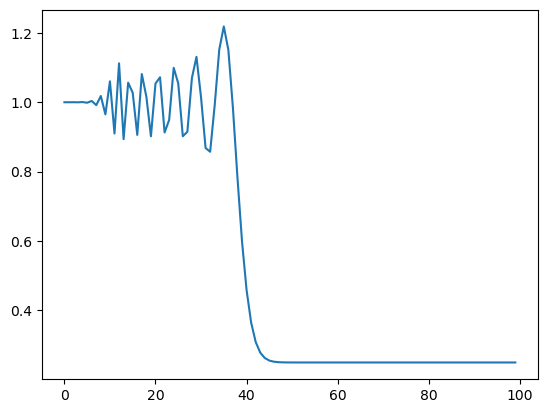

In [104]:
#(data,index=0,x=None,ymin=None,ymax=None,ylabel=None,idxnames=None,idxvals=None,idxformat='')
plt.plot(rho_mat[198, :])

In [105]:
N, Nt = 100, 2000
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1.0

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_upwind(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt-1):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u * (rho[i] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

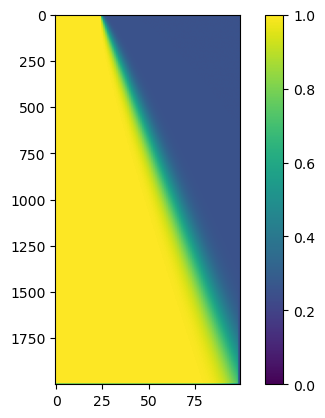

In [106]:
rho_mat = advect_upwind(t, x, u, rho)
plt.imshow(rho_mat, aspect = 0.1)
plt.colorbar()

# The problem is due to the fact we are not conserving the total mass! we have not coded the continuit equation

# A further problem is that we are "smearing" the edge, which began as a sharp devide

In [107]:
N, Nt = 100, 2000
x = np.linspace(0, 4,N)
t = np.linspace(0, 3, Nt)
u = 1 - np.tanh(2*(x-2))

def init_rho(x):
    rho = np.ones((N)) * 0.25
    mask = x <= 1
    rho[mask] = 1.0
    return rho

rho = init_rho(x)

def advect_upwind(t, x, u, rho):
    rho_mat = np.zeros((Nt, N))
    for n in range(1, Nt-1):
        rho_mat[n, :] = rho
        for i in range(1, N-1):
            if (i == 0):
                rho[i] = 1.0
            elif (i == (N-1)):
                rho[i] = 0.25
            else:
                rho[i] = rho[i] + (-u[i] * (rho[i] - rho[i-1]) / (x[i+1] - x[i-1])) * (t[n+1] - t[n-1])
    return rho_mat

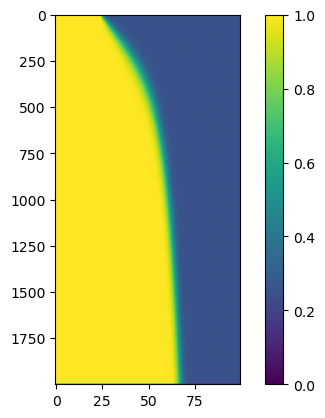

In [108]:
rho_mat = advect_upwind(t, x, u, rho)
plt.imshow(rho_mat, aspect = 0.1)
plt.colorbar()

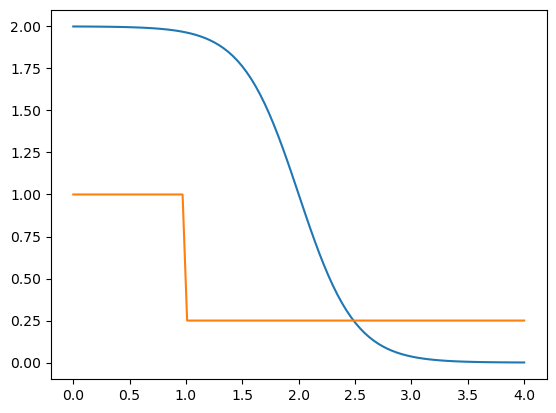

In [109]:
plt.plot(x, u)
plt.plot(x,init_rho(x))

In [127]:
def advect(xi, rho, ui, dt):
    rhonew = np.zeros_like(rho)

    dx = xi[1] - x[0]
    rhonew[-2] = 0.25
    rhonew[-1] = 0.25
    rhonew[:-2] = rho[:-2] - dt / dx * (rho[:-2] * (ui[:-2] + ui[1:-1])/2 - rho[1:-1] * (ui[1:-1] + ui[2:])/2)
    return rhonew

In [111]:
def advect_conservative_donorcell(xi,rho,ui,dt):
    dx = xi[1] - x[0]
    rhonew             = np.zeros_like(rho)
    rhonew[0]          = rho[0]
    rhonew[-1]         = rho[-1]
    F                  = np.zeros(len(ui))
    mask               = ui[0:-1]>0
    F[0:-1][mask]      = rho[0:-1][mask] * ui[0:-1][mask]
    mask               = ui[0:-1]<0
    F[1:][mask]        = rho[1:][mask]  * ui[1:][mask]
    rhonew[1:-1]       = rho[1:-1] - dt * ( F[1:-1] - F[0:-2] ) / dx
    return rhonew

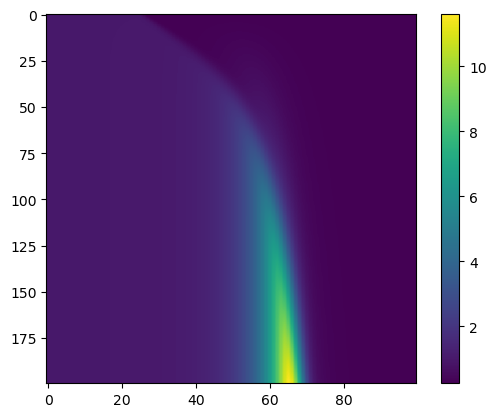

In [130]:
Nt = 200
rho_mat = np.zeros((Nt, N))
rho = init_rho(x)
dt = 3.0 / 200.0
for i in range(Nt):
    rho = advect_conservative_donorcell(x,rho, u, dt)
    rho_mat[i, :] = rho
plt.imshow(rho_mat, aspect = 0.5)
plt.colorbar()


(0.0, 2.0)

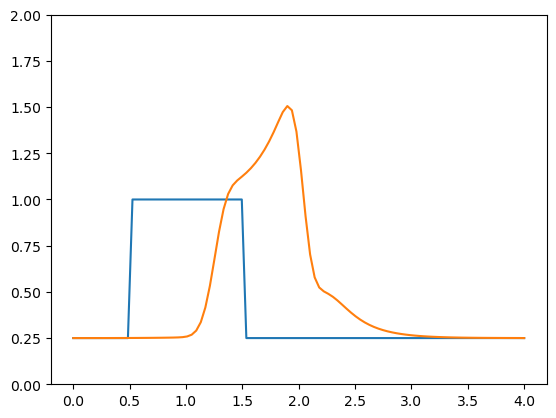

In [134]:
plt.plot(x, rho_mat[0, :])
plt.plot(x, rho_mat[25, :])
plt.ylim(0, 2)

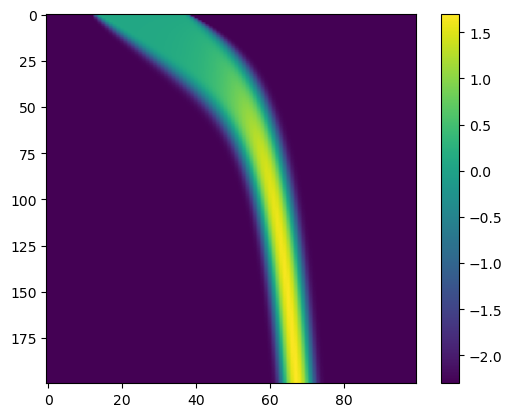

In [135]:
def init2_rho(x):
    rho = np.zeros(x.shape)
    mask1 = 0.5 <= x
    mask2 = x <= 1.5
    mask = mask1 * mask2
    rho[mask] = 1.0
    return rho
    
Nt = 200
rho_mat = np.zeros((Nt, N))
rho = init2_rho(x)

dt = 3.0 / 200.0
for i in range(Nt):
    rho_mat[i, :] = rho
    rho = advect_conservative_donorcell(x,rho, u, dt)
plt.imshow(np.log(rho_mat+1e-1), aspect = 0.5)
plt.colorbar()

1.0101010101010102
1.0101010101010113


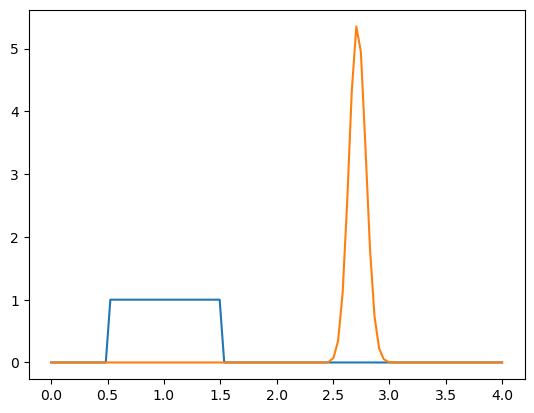

In [136]:

plt.plot(x, rho_mat[0, :])
plt.plot(x, rho_mat[199, :])

print(np.trapz(rho_mat[0, :], x))
print(np.trapz(rho_mat[199, :], x))

In [147]:
def advect_conservative_donorcell(xi,rho,ui,dt):
    rhonew             = np.zeros_like(rho)
    rhonew[0]          = rho[0]
    rhonew[-1]         = rho[-1]
    F                  = np.zeros(len(ui))
    mask               = ui[1:-1]>0
    F[1:-1][mask]      = rho[:-1][mask] * ui[1:-1][mask]
    mask               = ui[1:-1]<0
    F[1:-1][mask]      = rho[1:][mask]  * ui[1:-1][mask]
    rhonew[1:-1]       = rho[1:-1] - dt * ( F[2:-1] - F[1:-2] ) / ( xi[2:-1] - xi[1:-2] )
    return rhonew

(101,) (101,) (100,)


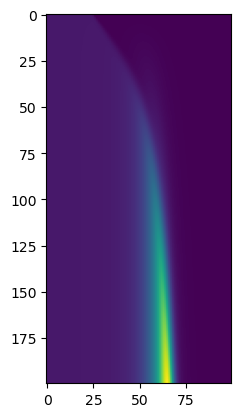

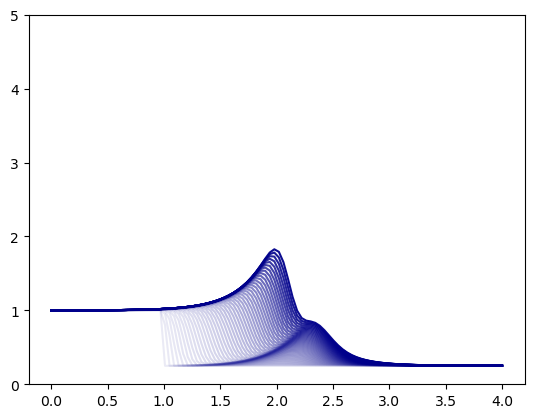

In [174]:
xi = np.linspace(0, 4, 101)
ui = 1 - np.tanh(2*(xi-2))

rho = init_rho(x)

print(ui.shape, xi.shape, rho.shape)
dt = 3.0 / 200.0
rhomat = np.zeros((200, 100))
for n in range(200):
    rhomat[n, :] = rho
    rho = advect_conservative_donorcell(xi, rho, ui, dt)
plt.imshow(rhomat)
plt.show()

tmax = 50
plt.ylim(0, 5)
for t in range(tmax):
    plt.plot(x, rhomat[t, :], color="darkblue", alpha=np.exp(-(tmax-t)/20))
plt.show()

In [177]:

def advect_translation_upwind(xc,rho,uc,dt):
    rhonew             = np.zeros_like(rho)
    rhonew[0]          = rho[0]
    rhonew[-1]         = rho[-1]
    mask               = uc[1:-1]>0
    eps                = uc[1:-1]*dt/(xc[1:-1]-xc[:-2])
    rhonew[1:-1][mask] = eps[mask] * rho[:-2][mask] + (1-eps[mask]) * rho[1:-1][mask]
    mask               = uc[1:-1]<0
    eps                = uc[1:-1]*dt/(xc[1:-1]-xc[2:])
    rhonew[1:-1][mask] = eps[mask] * rho[2:][mask] + (1-eps[mask]) * rho[1:-1][mask]
    return rhonew

(101,) (101,) (100,)


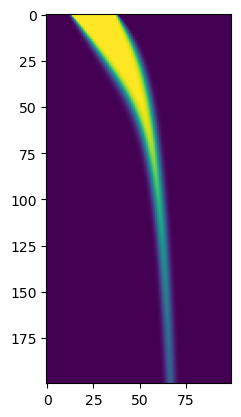

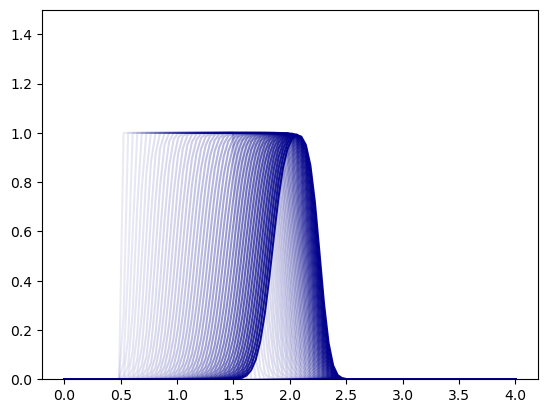

1.0101010101010102
0.05784126815757862


In [183]:
xc = np.linspace(0, 4, 100)
uc = 1 - np.tanh(2*(xc-2))

rho = init2_rho(x)

print(ui.shape, xi.shape, rho.shape)
dt = 3.0 / 200.0
rhomat = np.zeros((200, 100))
for n in range(200):
    rhomat[n, :] = rho
    rho = advect_translation_upwind(xc, rho, uc, dt)
plt.imshow(rhomat)
plt.show()

tmax = 50
plt.ylim(0, 1.5)
for t in range(tmax):
    plt.plot(x, rhomat[t, :], color="darkblue", alpha=np.exp(-(tmax-t)/20))
plt.show()

print(np.trapz(rhomat[0, :], x))
print(np.trapz(rhomat[199, :], x))